### Global Objectives

1. Build model to predict customer churn
    - Find Drivers of customer churn at Telco
    - Build ML model predictig churn
    - Document process in deliverables
2. Deliver 5 minute-presentation for CODEUP Data Science team

#### Requirements

1. Document code, process findings, and takeaways in Jupyter Notebook
2. Create the modules "acquire" and "prepare"
3. Provide high-level walkthrough of Jupyter Notebook
4. Answer CODEUP panel's questions

#### Deliverables

1. jupyter notebook as walkthrough report
2. "READ ME" file with all the specifics related to the data process
3. CSV file
4. Individual modules contianing functions


#### Method

1. Design and layout strategy
2. Acquire data
3. Prepare data
 - Clean
 - Split: train | validate | test

4. Explore and Analyze Data
 - Formulate hypothesis
 - Perform statistical testing
 
5. Model and Evaluate
 - Establish Baseline accuracy
 - Train model(s)
 - Determine which is the most effective model
 - Test model


### Step 2. Acquire Data

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
from env import username, password, host
import os
from acquire import get_connection

In [2]:
# First, we need to pull the dataset we are interested on working with

sql_query = '''select *
    from customers
    join contract_types using(contract_type_id)
    join internet_service_types using(internet_service_type_id)
    join payment_types using(payment_type_id)'''

df = pd.read_sql(sql_query, get_connection('telco_churn'))

In [3]:
#Now, let's turn that into something repeatable by wrapping it into a function

def telco_churn_data():
    '''
    This function pulls the telco_churn dataset and turns it into a python-ready dataframe,
    '''
    # Wrap the process of creating a SQL query into python function structure
    sql_query = '''select *
    from customers
    join contract_types using(contract_type_id)
    join internet_service_types using(internet_service_type_id)
    join payment_types using(payment_type_id)'''
    # Returns the SQL dataset as a python-ready dataframe
    df = pd.read_sql(sql_query, get_connection('telco_churn'))
    return df

In [4]:
# In order to make it more efficient, let's make sure the SQL pull becomes a local csv file

def churn_data_csv(cached = False):
    '''
    This function pulls in the telco_churn database, saves it as a csv file, and returns a pandas dataframe
    '''
    if cached == False or os.path.isfile('telco_churn.csv') == False:
        df = telco_churn_data()
        df.to_csv('telco_churn_df.csv')
    else:
        df = pd.read_csv('telco_churn_df.csv', index_col=0)
    return df

In [5]:
# Now, let's turn our data pull into a pandas dataframe which we can apply methods, and properties

telco_df = churn_data_csv(cached=False)
telco_df

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,3,1,9962-BFPDU,Female,0,Yes,Yes,1,Yes,...,No internet service,No internet service,No internet service,No,20.05,20.05,No,Month-to-month,None,Mailed check
7039,2,3,1,9967-ATRFS,Female,0,No,No,19,Yes,...,No internet service,No internet service,No internet service,No,19.90,367.55,No,Month-to-month,None,Mailed check
7040,4,3,1,9970-QBCDA,Female,0,No,No,6,Yes,...,No internet service,No internet service,No internet service,No,19.70,129.55,No,Month-to-month,None,Credit card (automatic)
7041,2,3,1,9975-SKRNR,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,No,18.90,18.9,No,Month-to-month,None,Mailed check


In [6]:
# We need to understand the type of information/data we are working with, so we can determine our preparing strategy
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [7]:
telco_df.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


### 3. Prepare data
 - Clean
 - Split: train | validate | test

### Step 3. Prepare Data: Clean

Now that we understand the structure and type of variables we are workig with, we can determine whether we need to manipulate the data to facilitate variable interaction and analysis.

- At a glance, we can determine that our analysis will be easier if we turn some of our variables into measurable formats, such as floats or integers. By turning them into masureable formats, we will facilitate interaction between variables that would otherwise be too difficult to quantify.

In [8]:
telco_df.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

##### First, we will leverage the "get_dummies" function to ensure that our data is tidy and that each column is holding only 1 variable, and there is one column per variable. Thus, we will break and consolidate multi-variable columns into separate columns containing 1 variable each. The variables that need to tidy are:

'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'gender', 'contract_type', 'internet_service_type', and 'payment_type'

In [9]:
telco_dummy_df = pd.get_dummies(telco_df[["internet_service_type", "payment_type"]], drop_first=False)
telco_df = telco_df.join(telco_dummy_df)
telco_df

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,contract_type,internet_service_type,payment_type,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Two year,DSL,Mailed check,1,0,0,0,0,0,1
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Two year,DSL,Credit card (automatic),1,0,0,0,1,0,0
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Two year,DSL,Bank transfer (automatic),1,0,0,1,0,0,0
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Two year,DSL,Credit card (automatic),1,0,0,0,1,0,0
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Two year,DSL,Bank transfer (automatic),1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,3,1,9962-BFPDU,Female,0,Yes,Yes,1,Yes,...,Month-to-month,None,Mailed check,0,0,1,0,0,0,1
7039,2,3,1,9967-ATRFS,Female,0,No,No,19,Yes,...,Month-to-month,None,Mailed check,0,0,1,0,0,0,1
7040,4,3,1,9970-QBCDA,Female,0,No,No,6,Yes,...,Month-to-month,None,Credit card (automatic),0,0,1,0,1,0,0
7041,2,3,1,9975-SKRNR,Male,0,No,No,1,Yes,...,Month-to-month,None,Mailed check,0,0,1,0,0,0,1


##### Second, we will turn the following variables containing boolean values into a binary system: True values will take on the value of 1, while False values will take on the value of 0. We will use this interpretation seizing on the common assumption that the number 1 represents the presence of something, while the number 0 represents the absence of something:

'is_female', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn'

In [10]:
telco_df["is_female"] = telco_df.gender == "Female"
telco_df['is_female'] = (telco_df['is_female'] == True ).astype(int)
telco_df["partner"] = telco_df.partner == "Yes"
telco_df['partner'] = (telco_df['partner'] == True ).astype(int)
telco_df["dependents"] = telco_df.dependents == "Yes"
telco_df['dependents'] = (telco_df['dependents'] == True ).astype(int)
telco_df["phone_service"] = telco_df.phone_service == "Yes"
telco_df['phone_service'] = (telco_df['phone_service'] == True ).astype(int)
telco_df["multiple_lines"] = telco_df.multiple_lines == "Yes"
telco_df['multiple_lines'] = (telco_df['multiple_lines'] == True ).astype(int)
telco_df["online_security"] = telco_df.online_security == "Yes"
telco_df['online_security'] = (telco_df['online_security'] == True ).astype(int)
telco_df["online_backup"] = telco_df.online_backup == "Yes"
telco_df['online_backup'] = (telco_df['online_backup'] == True ).astype(int)
telco_df["device_protection"] = telco_df.device_protection == "Yes"
telco_df['device_protection'] = (telco_df['device_protection'] == True ).astype(int)
telco_df["tech_support"] = telco_df.tech_support == "Yes"
telco_df['tech_support'] = (telco_df['tech_support'] == True ).astype(int)
telco_df["streaming_tv"] = telco_df.streaming_tv == "Yes"
telco_df['streaming_tv'] = (telco_df['streaming_tv'] == True ).astype(int)
telco_df["streaming_movies"] = telco_df.streaming_movies == "Yes"
telco_df['streaming_movies'] = (telco_df['streaming_movies'] == True ).astype(int)
telco_df["paperless_billing"] = telco_df.paperless_billing == "Yes"
telco_df['paperless_billing'] = (telco_df['paperless_billing'] == True ).astype(int)
telco_df["churn"] = telco_df.churn == "Yes"
telco_df['churn'] = (telco_df['churn'] == True ).astype(int)

telco_df

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,internet_service_type,payment_type,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,is_female
0,2,1,3,0016-QLJIS,Female,0,1,1,65,1,...,DSL,Mailed check,1,0,0,0,0,0,1,1
1,4,1,3,0017-DINOC,Male,0,0,0,54,0,...,DSL,Credit card (automatic),1,0,0,0,1,0,0,0
2,3,1,3,0019-GFNTW,Female,0,0,0,56,0,...,DSL,Bank transfer (automatic),1,0,0,1,0,0,0,1
3,4,1,3,0056-EPFBG,Male,0,1,1,20,0,...,DSL,Credit card (automatic),1,0,0,0,1,0,0,0
4,3,1,3,0078-XZMHT,Male,0,1,0,72,1,...,DSL,Bank transfer (automatic),1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,3,1,9962-BFPDU,Female,0,1,1,1,1,...,None,Mailed check,0,0,1,0,0,0,1,1
7039,2,3,1,9967-ATRFS,Female,0,0,0,19,1,...,None,Mailed check,0,0,1,0,0,0,1,1
7040,4,3,1,9970-QBCDA,Female,0,0,0,6,1,...,None,Credit card (automatic),0,0,1,0,1,0,0,1
7041,2,3,1,9975-SKRNR,Male,0,0,0,1,1,...,None,Mailed check,0,0,1,0,0,0,1,0


##### Third, we will simplify some column names and streamline for better data management

1. internet_service_type_DSL = dsl
2. internet_service_type_Fiber optic = fiber_optic
3. internet_service_type_None" = none
4. payment_type_Bank transfer (automatic) = bank_transfer
5. payment_type_Credit card (automatic) = credit_card
6. payment_type_Electronic check = e_check
7. payment_type_Mailed check = mailed_check

In [11]:
telco_df = telco_df.rename(columns={'internet_service_type_DSL': 'dsl', 'internet_service_type_Fiber optic': 'fiber_optic', 
                       'internet_service_type_None': 'no_internet', 'payment_type_Bank transfer (automatic)': 'bank_transfer', 
                       'payment_type_Credit card (automatic)': 'credit_card', 'payment_type_Electronic check': 'e_check', 
                       'payment_type_Mailed check': 'mailed_check'})
telco_df

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,internet_service_type,payment_type,dsl,fiber_optic,no_internet,bank_transfer,credit_card,e_check,mailed_check,is_female
0,2,1,3,0016-QLJIS,Female,0,1,1,65,1,...,DSL,Mailed check,1,0,0,0,0,0,1,1
1,4,1,3,0017-DINOC,Male,0,0,0,54,0,...,DSL,Credit card (automatic),1,0,0,0,1,0,0,0
2,3,1,3,0019-GFNTW,Female,0,0,0,56,0,...,DSL,Bank transfer (automatic),1,0,0,1,0,0,0,1
3,4,1,3,0056-EPFBG,Male,0,1,1,20,0,...,DSL,Credit card (automatic),1,0,0,0,1,0,0,0
4,3,1,3,0078-XZMHT,Male,0,1,0,72,1,...,DSL,Bank transfer (automatic),1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,3,1,9962-BFPDU,Female,0,1,1,1,1,...,None,Mailed check,0,0,1,0,0,0,1,1
7039,2,3,1,9967-ATRFS,Female,0,0,0,19,1,...,None,Mailed check,0,0,1,0,0,0,1,1
7040,4,3,1,9970-QBCDA,Female,0,0,0,6,1,...,None,Credit card (automatic),0,0,1,0,1,0,0,1
7041,2,3,1,9975-SKRNR,Male,0,0,0,1,1,...,None,Mailed check,0,0,1,0,0,0,1,0


##### Fourth, standarize the following variable to integer format:

'total_charges'

In [12]:
telco_df.total_charges = telco_df.total_charges.str.strip()
telco_df = telco_df[telco_df.total_charges != ""]
telco_df['total_charges'] = telco_df.total_charges.replace("'", '')
telco_df['total_charges'] = telco_df.total_charges.replace(" ", "")
telco_df['total_charges'] = telco_df.total_charges.replace(",", "")
telco_df['total_charges'] = telco_df.total_charges.astype(float)
telco_df

<ipython-input-12-e9a7310acd07>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco_df['total_charges'] = telco_df.total_charges.replace("'", '')
<ipython-input-12-e9a7310acd07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco_df['total_charges'] = telco_df.total_charges.replace(" ", "")
<ipython-input-12-e9a7310acd07>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,internet_service_type,payment_type,dsl,fiber_optic,no_internet,bank_transfer,credit_card,e_check,mailed_check,is_female
0,2,1,3,0016-QLJIS,Female,0,1,1,65,1,...,DSL,Mailed check,1,0,0,0,0,0,1,1
1,4,1,3,0017-DINOC,Male,0,0,0,54,0,...,DSL,Credit card (automatic),1,0,0,0,1,0,0,0
2,3,1,3,0019-GFNTW,Female,0,0,0,56,0,...,DSL,Bank transfer (automatic),1,0,0,1,0,0,0,1
3,4,1,3,0056-EPFBG,Male,0,1,1,20,0,...,DSL,Credit card (automatic),1,0,0,0,1,0,0,0
4,3,1,3,0078-XZMHT,Male,0,1,0,72,1,...,DSL,Bank transfer (automatic),1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,3,1,9962-BFPDU,Female,0,1,1,1,1,...,None,Mailed check,0,0,1,0,0,0,1,1
7039,2,3,1,9967-ATRFS,Female,0,0,0,19,1,...,None,Mailed check,0,0,1,0,0,0,1,1
7040,4,3,1,9970-QBCDA,Female,0,0,0,6,1,...,None,Credit card (automatic),0,0,1,0,1,0,0,1
7041,2,3,1,9975-SKRNR,Male,0,0,0,1,1,...,None,Mailed check,0,0,1,0,0,0,1,0


##### Fifth, we need to drop the columns that are repetitive or that, after cleaning, are irrelevant to our process. Therefore, we need to drop the following columns after we consolidate their values with their respective variables:

'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'gender', 'contract_type', 'internet_service_type', and 'payment_type'

In [13]:
telco_df = telco_df.drop(["payment_type_id", 'internet_service_type_id', 'contract_type_id', 'gender', "contract_type",
                          'internet_service_type', 'payment_type'], axis=1)
telco_df

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,dsl,fiber_optic,no_internet,bank_transfer,credit_card,e_check,mailed_check,is_female
0,0016-QLJIS,0,1,1,65,1,1,1,1,1,...,5957.90,0,1,0,0,0,0,0,1,1
1,0017-DINOC,0,0,0,54,0,0,1,0,0,...,2460.55,0,1,0,0,0,1,0,0,0
2,0019-GFNTW,0,0,0,56,0,0,1,1,1,...,2560.10,0,1,0,0,1,0,0,0,1
3,0056-EPFBG,0,1,1,20,0,0,1,0,1,...,825.40,0,1,0,0,0,1,0,0,0
4,0078-XZMHT,0,1,0,72,1,1,0,1,1,...,6316.20,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9962-BFPDU,0,1,1,1,1,0,0,0,0,...,20.05,0,0,0,1,0,0,0,1,1
7039,9967-ATRFS,0,0,0,19,1,0,0,0,0,...,367.55,0,0,0,1,0,0,0,1,1
7040,9970-QBCDA,0,0,0,6,1,0,0,0,0,...,129.55,0,0,0,1,0,1,0,0,1
7041,9975-SKRNR,0,0,0,1,1,0,0,0,0,...,18.90,0,0,0,1,0,0,0,1,0


In [14]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   senior_citizen     7032 non-null   int64  
 2   partner            7032 non-null   int64  
 3   dependents         7032 non-null   int64  
 4   tenure             7032 non-null   int64  
 5   phone_service      7032 non-null   int64  
 6   multiple_lines     7032 non-null   int64  
 7   online_security    7032 non-null   int64  
 8   online_backup      7032 non-null   int64  
 9   device_protection  7032 non-null   int64  
 10  tech_support       7032 non-null   int64  
 11  streaming_tv       7032 non-null   int64  
 12  streaming_movies   7032 non-null   int64  
 13  paperless_billing  7032 non-null   int64  
 14  monthly_charges    7032 non-null   float64
 15  total_charges      7032 non-null   float64
 16  churn              7032 

In [15]:
telco_df.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
phone_service,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
multiple_lines,7032.0,0.421928,0.493902,0.00,0.0000,0.000,1.0000,1.00
online_security,7032.0,0.286547,0.452180,0.00,0.0000,0.000,1.0000,1.00
online_backup,7032.0,0.344852,0.475354,0.00,0.0000,0.000,1.0000,1.00
device_protection,7032.0,0.343857,0.475028,0.00,0.0000,0.000,1.0000,1.00
tech_support,7032.0,0.290102,0.453842,0.00,0.0000,0.000,1.0000,1.00


In [16]:
# Now that we have cleaned and tidy our data to a degree in which we feel confortable to make it iterable, let's wrap
# all this process into a pandas function

def clean_telco_df(telco_df):
    
    # First, we will leverage the "get_dummies" function to ensure that our data is tidy and that each column is
    # holding only 1 variable, and there is one column per variable. Thus, we will break and consolidate
    # multi-variable columns into separate columns containing 1 variable each
    telco_dummy_df = pd.get_dummies(telco_df[["internet_service_type", "payment_type"]], drop_first=False)
    telco_df = telco_df.join(telco_dummy_df)
    
    # Second, we will turn the following variables containing boolean values into a binary system: True values will
    # take on the value of 1, while False values will take on the value of 0. We will use this interpretation seizing
    # on the common assumption that the number 1 represents the presence of something, while the number 0 represents
    # the absence of something
    telco_df["is_female"] = telco_df.gender == "Female"
    telco_df['is_female'] = (telco_df['is_female'] == True ).astype(int)
    telco_df["partner"] = telco_df.partner == "Yes"
    telco_df['partner'] = (telco_df['partner'] == True ).astype(int)
    telco_df["dependents"] = telco_df.dependents == "Yes"
    telco_df['dependents'] = (telco_df['dependents'] == True ).astype(int)
    telco_df["phone_service"] = telco_df.phone_service == "Yes"
    telco_df['phone_service'] = (telco_df['phone_service'] == True ).astype(int)
    telco_df["multiple_lines"] = telco_df.multiple_lines == "Yes"
    telco_df['multiple_lines'] = (telco_df['multiple_lines'] == True ).astype(int)
    telco_df["online_security"] = telco_df.online_security == "Yes"
    telco_df['online_security'] = (telco_df['online_security'] == True ).astype(int)
    telco_df["online_backup"] = telco_df.online_backup == "Yes"
    telco_df['online_backup'] = (telco_df['online_backup'] == True ).astype(int)
    telco_df["device_protection"] = telco_df.device_protection == "Yes"
    telco_df['device_protection'] = (telco_df['device_protection'] == True ).astype(int)
    telco_df["tech_support"] = telco_df.tech_support == "Yes"
    telco_df['tech_support'] = (telco_df['tech_support'] == True ).astype(int)
    telco_df["streaming_tv"] = telco_df.streaming_tv == "Yes"
    telco_df['streaming_tv'] = (telco_df['streaming_tv'] == True ).astype(int)
    telco_df["streaming_movies"] = telco_df.streaming_movies == "Yes"
    telco_df['streaming_movies'] = (telco_df['streaming_movies'] == True ).astype(int)
    telco_df["paperless_billing"] = telco_df.paperless_billing == "Yes"
    telco_df['paperless_billing'] = (telco_df['paperless_billing'] == True ).astype(int)
    telco_df["churn"] = telco_df.churn == "Yes"
    telco_df['churn'] = (telco_df['churn'] == True ).astype(int)
    
    # Third, we will simplify some column names and streamline for better data management
    telco_df = telco_df.rename(columns={'internet_service_type_DSL': 'dsl', 'internet_service_type_Fiber optic': 'fiber_optic', 
                       'internet_service_type_None': 'no_internet', 'payment_type_Bank transfer (automatic)': 'bank_transfer', 
                       'payment_type_Credit card (automatic)': 'credit_card', 'payment_type_Electronic check': 'e_check', 
                       'payment_type_Mailed check': 'mailed_check'})
    
    # Fourth, standarize the remaining variables to integer format
    telco_df.total_charges = telco_df.total_charges.str.strip()
    telco_df = telco_df[telco_df.total_charges != ""]
    telco_df['total_charges'] = telco_df.total_charges.replace("'", '')
    telco_df['total_charges'] = telco_df.total_charges.replace(" ", "")
    telco_df['total_charges'] = telco_df.total_charges.replace(",", "")
    telco_df['total_charges'] = telco_df.total_charges.astype(float)
    
    # Fifth, we need to drop the columns that are repetitive or that, after cleaning, are irrelevant to our process
    telco_df = telco_df.drop(["payment_type_id", 'internet_service_type_id', 'contract_type_id', 'gender', "contract_type",
                          'internet_service_type', 'payment_type'], axis=1)
    
    # We close the function to make sure its sintax is sound
    return telco_df

### Step 3. Prepare Data: Split: Train | Validate | Test

In [17]:
# Before I can start exploring the data that I need to use for my model development, I need to split the dataset into
# categories that allow me to keep it under a controlled testing environment. Thus, I need to apply the following
# function to my data set:

from sklearn.model_selection import train_test_split

def train_validate_test_split(telco_df, seed=123):
    train_and_validate, test = train_test_split(
        telco_df, test_size=0.2, random_state=seed, stratify=telco_df.churn
    )
    train, validate = train_test_split(
        train_and_validate,
        test_size=0.3,
        random_state=seed,
        stratify=train_and_validate.churn,
    )
    return train, validate, test

In [18]:
train, test, validate = train_validate_test_split(telco_df, seed=123)

In [19]:
# As visualizing my sets is very helpfu for me, I will show each one of my split sets
train.head()

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,dsl,fiber_optic,no_internet,bank_transfer,credit_card,e_check,mailed_check,is_female
6096,8966-SNIZF,0,1,0,70,1,0,0,0,0,...,1303.50,0,0,0,1,1,0,0,0,1
1603,3466-BYAVD,0,1,1,15,1,0,0,1,1,...,1071.40,0,1,0,0,0,0,0,1,0
5350,9278-VZKCD,1,1,0,52,1,1,1,1,1,...,5647.95,0,0,1,0,0,0,1,0,1
2068,7074-STDCN,0,0,0,39,0,0,0,0,0,...,1494.50,0,1,0,0,0,0,1,0,0
6366,5914-GXMDA,0,1,0,32,1,0,0,0,0,...,593.20,0,0,0,1,0,0,0,1,1


In [20]:
test.head()

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,dsl,fiber_optic,no_internet,bank_transfer,credit_card,e_check,mailed_check,is_female
611,9778-OGKQZ,0,1,0,72,1,1,1,1,1,...,6782.15,0,1,0,0,0,1,0,0,0
1155,9251-WNSOD,0,1,0,67,1,1,1,1,1,...,5064.45,0,1,0,0,0,0,0,1,1
4916,7044-YAACC,1,1,0,4,1,0,0,0,0,...,280.35,0,0,1,0,0,0,1,0,0
2816,9239-GZHZE,0,1,0,72,1,1,1,1,1,...,8124.20,0,0,1,0,0,1,0,0,1
5301,9003-CPATH,0,0,0,42,1,1,0,0,1,...,3313.40,0,0,1,0,0,0,1,0,0


In [21]:
validate.head()

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,dsl,fiber_optic,no_internet,bank_transfer,credit_card,e_check,mailed_check,is_female
2897,0864-FVJNJ,0,1,1,64,1,1,1,1,1,...,7222.75,0,0,1,0,0,0,1,0,1
6407,6870-ECSHE,0,0,0,2,1,0,0,0,0,...,34.80,0,0,0,1,0,0,0,1,1
6272,3452-FLHYD,0,1,0,25,1,0,0,0,0,...,495.15,0,0,0,1,1,0,0,0,0
5638,1927-QEWMY,0,1,0,72,1,0,0,0,0,...,1502.25,0,0,0,1,0,1,0,0,1
903,4872-VXRIL,0,0,0,56,1,1,1,1,0,...,3665.55,0,1,0,0,1,0,0,0,0


I can move now to the exploratory portion of this project, since I now have a good idea of what my dataset looks like and can start figuring out what are some of the potential relationships between its different variables

### 4. Explore and Analyze Data
 - Formulate hypothesis
 - Perform statistical testing

Before I can develop a potential explanation, or hypothesis, to explain the phenomenon I want to analyze, I need to have an preliminary idea of how my variables interacr with one another.

The most concise manner to achieve this is by using a correlation table and visualizing it; thus, I will apply a correlation table method to my DataFrame and display it to highlight the relationships between my variables in a "one-stop-shop" manner.

<ipython-input-22-d2557be0f81e>:7: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  norm = DivergingNorm(vmin = -1, vcenter = 0, vmax = 1)


Text(0.5, 1.0, 'Correlation Table Heatmap')

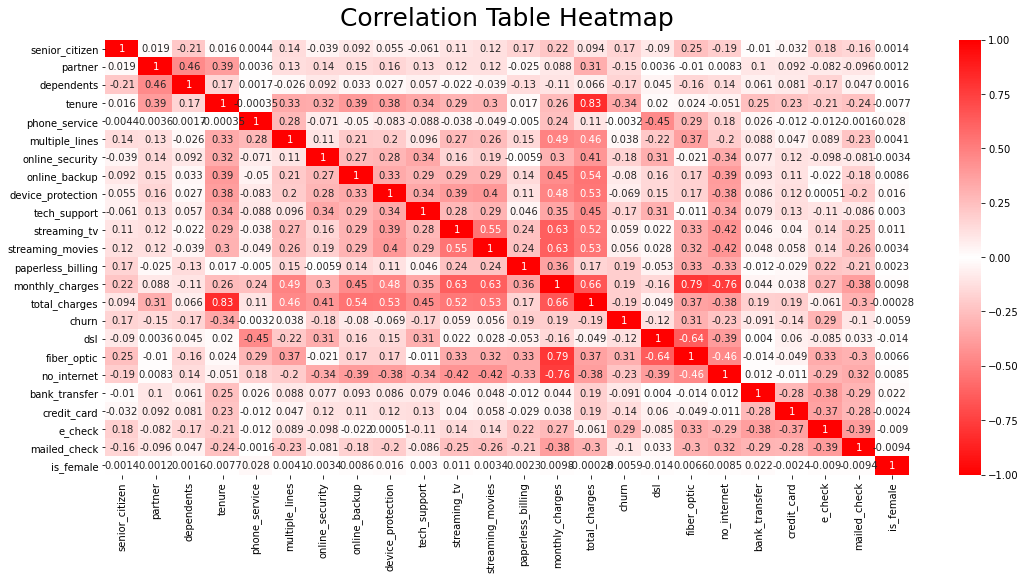

In [22]:
# My heatmap will highlight in every relationship between two variables with color red as it becomes more significant
# (it is farther form zero), and will be white as the relationship approaches zero, or becomes less significant.

from matplotlib.colors import LinearSegmentedColormap, DivergingNorm

cmap = LinearSegmentedColormap.from_list('white',['red','white','red'])
norm = DivergingNorm(vmin = -1, vcenter = 0, vmax = 1)

plt.figure(figsize = (18, 8))
corr_table = sns.heatmap(train.corr(), cmap = cmap, vmin = -1, vmax = 1, annot = True, center = 0)
corr_table.set_title('Correlation Table Heatmap', fontdict = {'fontsize': 25}, pad = 14)

My heatmap highlights an intense relationsip between several different variables, of which the most significant appear to be the following:

 1. total_charges / tenure
 2. monthly_charges / fiber_optic
 3. monthy_charges / no_internet
 4. monthy_charges / streaming_tv
 5. monthy_charges / straming_movies
 
##### However, none of these variable relationships addresses the variable we're most concerned with directly: "churn".

By recalling our original question: what causes customer churn? We can focus on the relationship between variables that are directly affecting the variable "churn", and the peripheral variable of "tenure". With this restriction, we can observe that the variables with the most significant relationship with "churn" and "tenure" are:

For "churn"
    
 1. fiber_optic (0.31)
 2. e_check (0.29)
 3. tenure (-0.34)

For "tenure"

 1. total_charges (0.83) 
 2. partner (0.39)
 3. online_backup (0.39)
 4. device_protection (0.38)
 5. tech_support (0.34)
 6. multiple_lines (0.33)
 7. online_security (0.32)
 8. streaming_movies (0.3)
 9. streaming_tv (0.29)

In the interest of time and efficiency, we have to decide on which variable relationships are paramount to answering our question, and which ones are only important to support a possible qualitative conclusion and recommendation. Thus, based on intensity and direct impact on churn, the relationships we need to focus on are:

 1. churn / fiber_optic
 2. churn / e_check
 3. churn / tenure
 4. tenure / device_protection
 5. tenure / partner
 6. tenure / online_backup
 
Although the tenure / total_charges relationship is the strongest in the heatmap, we will not be using it because there is really nothing significant the analysis of time and cummulative costs is linear and can hardly reveal anything non-intuitive.


Text(0, 0.5, 'count')

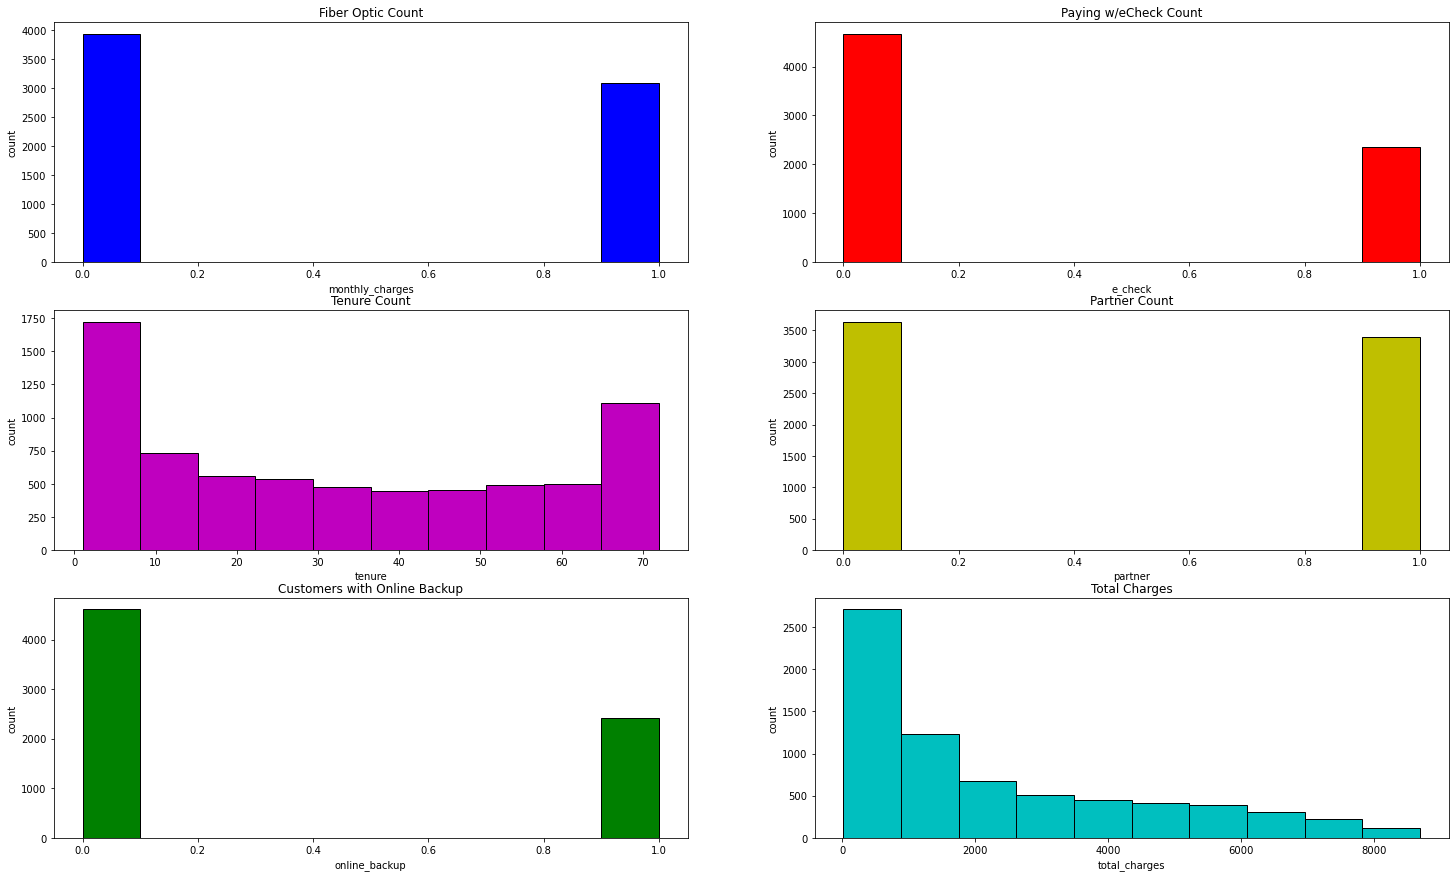

In [23]:
# Now, let's visually explore theese variables

plt.subplots(figsize = (25, 15))

plt.subplot(3,2,1)
line1 = plt.hist(telco_df.fiber_optic, facecolor = 'b', align = 'mid', edgecolor = 'black')
plt.title('Fiber Optic Count')
plt.xlabel('monthly_charges')
plt.ylabel('count')

plt.subplot(3,2,2)
line2 = plt.hist(telco_df.e_check, facecolor = "r", align = 'mid', edgecolor = 'black')
plt.title('Paying w/eCheck Count')
plt.xlabel('e_check')
plt.ylabel('count')

plt.subplot(3,2,3)
line3 = plt.hist(telco_df.tenure, facecolor = 'm', align = 'mid', edgecolor = 'black')
plt.title('Tenure Count')
plt.xlabel('tenure')
plt.ylabel('count')

plt.subplot(3,2,4)
line4 = plt.hist(telco_df.partner, facecolor = 'y', align = 'mid', edgecolor = 'black')
plt.title('Partner Count')
plt.xlabel('partner')
plt.ylabel('count')

plt.subplot(3,2,5)
line4 = plt.hist(telco_df.online_backup, facecolor = 'g', align = 'mid', edgecolor = 'black')
plt.title('Customers with Online Backup')
plt.xlabel('online_backup')
plt.ylabel('count')

plt.subplot(3,2,6)
line4 = plt.hist(telco_df.total_charges, facecolor = 'c', align = 'mid', edgecolor = 'black')
plt.title('Total Charges')
plt.xlabel('total_charges')
plt.ylabel('count')

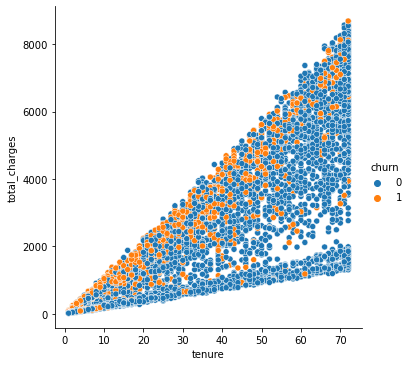

In [24]:
# A common assumption would be that the amount of total charges may be influencing the churn rate among customers, so
# lets explore this assumption visually
sns.relplot(data = telco_df, x = "tenure", y = "total_charges", hue = "churn")

##### There is no apparent difference between the total charges and customers churn rate. It is time to perform statistical tests on every variable relationship we determine was relevant.

### 4. Explore and Analyze Data: Formulate hypothesis (churn / fiber_optic)

𝐻0 : Customers' use of fiber optic has no relationship with the rate at which they churn

𝐻𝑎 : Customers' use of fiber optic has a significant influence on the rate at which they churn

### 4. Explore and Analyze Data: Perform statistical testing

1. Set confidence interval: conf_interval 0.95
2. Set Significance Level:  𝛼=.05 , or  𝛼=1−𝑐𝑜𝑛𝑓𝑖𝑑𝑒𝑛𝑐𝑒𝑖𝑛𝑡𝑒𝑟𝑣𝑎𝑙  (in other words Confidence level is 0.95)

In [25]:
# In order to compare two categorical variables, we need to perform a chi-square test on our data

observe = pd.crosstab(train.churn, train.fiber_optic, margins = True)

chi2, p, degf, expected = stats.chi2_contingency(observe)

null_hyp = "The customers' use of fiber optic has no relationship with the rate at which they churn"
alt_hyp = "The customers' use of fiber optic has a significant influence on the rate at which they churn"
confidence_int = 0.95
𝛼 = .05

if p < 𝛼:
    print("Based on the statistical test, where the chi-square value is: ", chi2.round(3), "; and the p value is: ", p.round(3), ". ", alt_hyp)
else:
    print("Based on the statistical test, where the chi-square value is: ", chi2.round(3), "; and the p value is: ", p.round(3), ". ", null_hyp)

Based on the statistical test, where the chi-square value is:  372.377 ; and the p value is:  0.0 .  The customers' use of fiber optic has a significant influence on the rate at which they churn


Text(0.5, 1.0, 'Customers Use of Fiber Optic and Their Churn Rate')

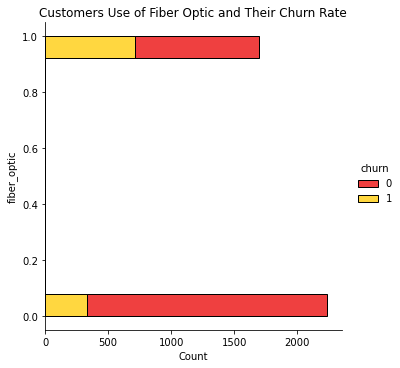

In [26]:
# Now, let's visualize the amount of churning customers in relationship with their use of fiber optic
sns.displot(train, y = "fiber_optic", hue = "churn", multiple = 'stack', palette = "hot")
plt.title('Customers Use of Fiber Optic and Their Churn Rate')

### 4. Explore and Analyze Data: Formulate hypothesis (churn / e_check)

𝐻0 : The customers' use of eChecks to pay has no relationship with the rate at which they churn

𝐻𝑎 : The customers' use of eChecks to pay has a significant relationship on the rate at which they churn

##### Perform statistical testing

1. Set confidence interval: conf_interval 0.95
2. Set Significance Level:  𝛼=.05 , or  𝛼=1−𝑐𝑜𝑛𝑓𝑖𝑑𝑒𝑛𝑐𝑒𝑖𝑛𝑡𝑒𝑟𝑣𝑎𝑙  (in other words Confidence level is 0.95)

In [27]:
# In order to compare two categorical variables, we need to perform a chi-square test on our data

observe = pd.crosstab(train.churn, train.e_check, margins = True)

chi2, p, degf, expected = stats.chi2_contingency(observe)

null_hyp = "The customers' use of eChecks to pay has no relationship with the rate at which they churn"
alt_hyp = "The customers' use of eChecks to pay has a significant relationship on the rate at which they churn"
confidence_int = 0.95
𝛼 = .05

if p < 𝛼:
    print("Based on the statistical test, where the chi-square value is: ", chi2.round(3), "; and the p value is: ", p.round(3), ". ", alt_hyp)
else:
    print("Based on the statistical test, where the chi-square value is: ", chi2.round(3), "; and the p value is: ", p.round(3), ". ", null_hyp)

Based on the statistical test, where the chi-square value is:  336.752 ; and the p value is:  0.0 .  The customers' use of eChecks to pay has a significant relationship on the rate at which they churn


Text(0.5, 1.0, 'Customers Use of eChecks and Their Churn Rate')

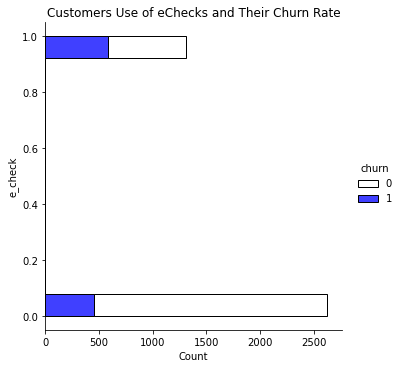

In [28]:
# Now, let's visualize the amount of churning customers in relationship with their habit of paying with eChecks
sns.displot(train, y = "e_check", hue = "churn", multiple = 'stack', palette = "flag")
plt.title('Customers Use of eChecks and Their Churn Rate')

### 4. Explore and Analyze Data: Formulate hypothesis (churn / tenure)

𝐻0 : The customers' tenure has no relationship with the rate at which they churn

𝐻𝑎 : The customers' tenure has a significant relationship on the rate at which they churn

##### Perform statistical testing

1. Set confidence interval: conf_interval 0.95
2. Set Significance Level:  𝛼=.05 , or  𝛼=1−𝑐𝑜𝑛𝑓𝑖𝑑𝑒𝑛𝑐𝑒𝑖𝑛𝑡𝑒𝑟𝑣𝑎𝑙  (in other words Confidence level is 0.95)

In [29]:
# In order to compare a categorical variable and a continuous one, we need to perform a t-test on our data

churned = train[train.churn == 1]
not_churned = train[train.churn == 0]

t, p = stats.ttest_ind(churned.tenure, not_churned.tenure)

null_hyp = "The customers' tenure has no relationship with the rate at which they churn"
alt_hyp = "The customers' tenure has a significant relationship on the rate at which they churn"
confidence_int = 0.95
𝛼 = .05

if p < 𝛼:
    print("Based on the statistical test, where the t-test value is: ", t.round(3), "; and the p value is: ", p.round(3), ". ", alt_hyp)
else:
    print("Based on the statistical test, where the t-test value is: ", t.round(3), "; and the p value is: ", p.round(3), ". ", null_hyp)

Based on the statistical test, where the t-test value is:  -22.74 ; and the p value is:  0.0 .  The customers' tenure has a significant relationship on the rate at which they churn


Text(0.5, 1.0, 'Customers Tenure and Their Churn Rate')

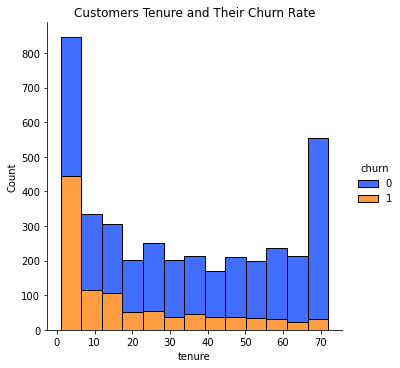

In [30]:
# Now, let's visualize the amount of churning customers in relationship with their tenure
sns.displot(train, x = "tenure", hue = "churn", multiple = 'stack', palette = "bright")
plt.title('Customers Tenure and Their Churn Rate')

### 4. Explore and Analyze Data: Formulate hypothesis (tenure / device_protection)

𝐻0 : The customers' tenure has no relationship with their use of device protection

𝐻𝑎 : The customers' tenure has a significant relationship with with their use of device protection

##### Perform statistical testing

1. Set confidence interval: conf_interval 0.95
2. Set Significance Level:  𝛼=.05 , or  𝛼=1−𝑐𝑜𝑛𝑓𝑖𝑑𝑒𝑛𝑐𝑒𝑖𝑛𝑡𝑒𝑟𝑣𝑎𝑙  (in other words Confidence level is 0.95)

In [31]:
# In order to compare a categorical variable and a continuous one, we need to perform a t-test on our data

dev_protection = train[train.device_protection == 1]
no_dev_protection = train[train.device_protection == 0]

t, p = stats.ttest_ind(dev_protection.tenure, no_dev_protection.tenure)

null_hyp = "The customers' tenure has no relationship with their use of device protection"
alt_hyp = "The customers' tenure has a significant relationship with with their use of device protection"
confidence_int = 0.95
𝛼 = .05

if p < 𝛼:
    print("Based on the statistical test, where the t-test value is: ", t.round(3), "; and the p value is: ", p.round(3), ". ", alt_hyp)
else:
    print("Based on the statistical test, where the t-test value is: ", t.round(3), "; and the p value is: ", p.round(3), ". ", null_hyp)

Based on the statistical test, where the t-test value is:  25.515 ; and the p value is:  0.0 .  The customers' tenure has a significant relationship with with their use of device protection


Text(0.5, 1.0, 'Customers Device Protection and Their Churn Rate')

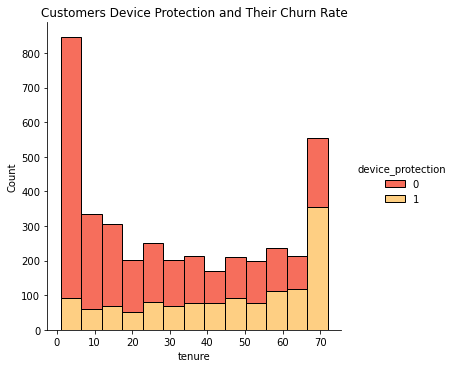

In [32]:
# Now, let's visualize customers' tenure in relationship with their use of device protection
sns.displot(train, x = "tenure", hue = "device_protection", multiple = 'stack', palette = "YlOrRd_r")
plt.title('Customers Device Protection and Their Churn Rate')

### 4. Explore and Analyze Data: Formulate hypothesis (tenure / partner)

𝐻0 : The customers' tenure has no relationship with whether they have a partner or not

𝐻𝑎 : The customers' tenure is significantly related with whether they have a partner or not

##### Perform statistical testing

1. Set confidence interval: conf_interval 0.95
2. Set Significance Level:  𝛼=.05 , or  𝛼=1−𝑐𝑜𝑛𝑓𝑖𝑑𝑒𝑛𝑐𝑒𝑖𝑛𝑡𝑒𝑟𝑣𝑎𝑙  (in other words Confidence level is 0.95)

In [33]:
# In order to compare a categorical variable and a continuous one, we need to perform a t-test on our data

has_partner = train[train.partner == 1]
has_no_partner = train[train.partner == 0]

t, p = stats.ttest_ind(has_partner.tenure, has_no_partner.tenure)

null_hyp = "The customers' tenure has no relationship with whether they have a partner or not"
alt_hyp = "The customers' tenure is significantly related with whether they have a partner or not"
confidence_int = 0.95
𝛼 = .05

if p < 𝛼:
    print("Based on the statistical test, where the t-test value is: ", t.round(3), "; and the p value is: ", p.round(3), ". ", alt_hyp)
else:
    print("Based on the statistical test, where the t-test value is: ", t.round(3), "; and the p value is: ", p.round(3), ". ", null_hyp)

Based on the statistical test, where the t-test value is:  26.612 ; and the p value is:  0.0 .  The customers' tenure is significantly related with whether they have a partner or not


Text(0.5, 1.0, 'Customers Tenure and Their Partner Status')

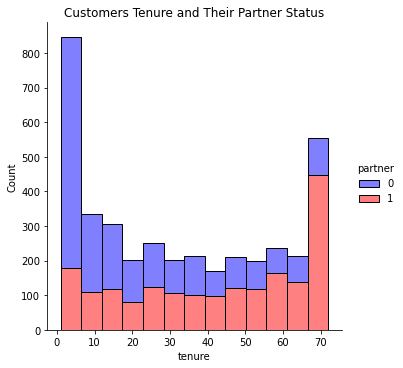

In [34]:
# Now, let's visualize customers' tenure in relationship with whether they have a partner or not
sns.displot(train, x = "tenure", hue = "partner", multiple = 'stack', palette = "seismic")
plt.title('Customers Tenure and Their Partner Status')

### 4. Explore and Analyze Data: Formulate hypothesis (tenure / online_backup)

𝐻0 : The customers' tenure has no relationship with whether they have online backup or not

𝐻𝑎 : The customers' tenure is significantly related with whether they have online backup or not

##### Perform statistical testing

1. Set confidence interval: conf_interval 0.95
2. Set Significance Level:  𝛼=.05 , or  𝛼=1−𝑐𝑜𝑛𝑓𝑖𝑑𝑒𝑛𝑐𝑒𝑖𝑛𝑡𝑒𝑟𝑣𝑎𝑙  (in other words Confidence level is 0.95)

In [35]:
# In order to compare a categorical variable and a continuous one, we need to perform a t-test on our data

has_backup = train[train.online_backup == 1]
has_no_backup = train[train.online_backup == 0]

t, p = stats.ttest_ind(has_backup.tenure, has_no_backup.tenure)

null_hyp = "The customers' tenure has no relationship with whether they have online backup or not"
alt_hyp = "The customers' tenure is significantly related with whether they have online backup or not"
confidence_int = 0.95
𝛼 = .05

if p < 𝛼:
    print("Based on the statistical test, where the t-test value is: ", t.round(3), "; and the p value is: ", p.round(3), ". ", alt_hyp)
else:
    print("Based on the statistical test, where the t-test value is: ", t.round(3), "; and the p value is: ", p.round(3), ". ", null_hyp)

Based on the statistical test, where the t-test value is:  26.718 ; and the p value is:  0.0 .  The customers' tenure is significantly related with whether they have online backup or not


Text(0.5, 1.0, 'Customers Tenure and Their Access to Online Backup')

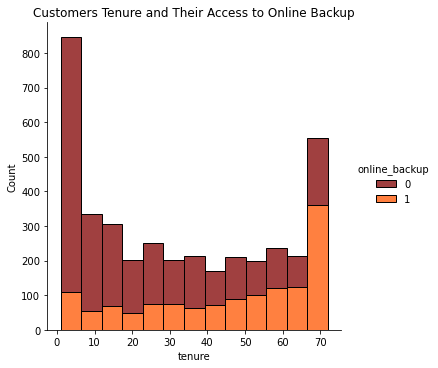

In [36]:
# Finally, let's visualize customers' tenure in relationship with their access to online backup
sns.displot(train, x = "tenure", hue = "online_backup", multiple = 'stack', palette = "gist_heat")
plt.title('Customers Tenure and Their Access to Online Backup')

### 5. Model and Evaluate
 - Establish Baseline accuracy
 - Train models
 - Determine which is the most effective model
 - Test model

### 5. Model and Evaluate: Establish Baseline accuracy

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [38]:
# We now need to split our data into three groups: train, validate, and test

X_train = train.drop(columns = ['churn'])
y_train = train.churn

X_validate = validate.drop(columns = ['churn'])
y_validate = validate.churn

X_test = test.drop(columns = ['churn'])
y_test = test.churn

In [39]:
# Since most customers have not churned, this value needs to be higher than its opposite (0 = has not churned)
y_train.value_counts()

0    2891
1    1046
Name: churn, dtype: int64

In [40]:
baseline_accuracy = (train.churn == 0).mean()
round(baseline_accuracy, 3)

0.734

### 5. Model and Evaluate: Decision Tree

In [43]:
# The variable relationships I chose are:
#  1. churn / fiber_optic
#  2. churn / e_check
#  3. churn / tenure
#  4. tenure / device_protection
#  5. tenure / partner
#  6. tenure / online_backup

features = ["fiber_optic", "e_check", "tenure", "device_protection", "partner", "online_backup"]

clf1 = DecisionTreeClassifier(max_depth = 3)

clf1.fit(X_train[features], y_train)

y_pred = clf1.predict(X_train[features])

y_pred_proba = clf1.predict_proba(X_train[features])

print('The level of Accuracy of this Decision Tree leveraging sample data is:', clf1.score(X_train[features], y_train).round(3))
print('\nIts Confusion Matrix:\n',confusion_matrix(y_train, y_pred))

print('\nAnd its Classification Report:\n',classification_report(y_train, y_pred))

The level of Accuracy of this Decision Tree leveraging sample data is: 0.792

Its Confusion Matrix:
 [[2704  187]
 [ 633  413]]

And its Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      2891
           1       0.69      0.39      0.50      1046

    accuracy                           0.79      3937
   macro avg       0.75      0.67      0.69      3937
weighted avg       0.78      0.79      0.77      3937



##### Precision
 - Percentage of correct predictions:
 - Not churned: 0.81
 - Churned: 0.69

##### Recall
 - Percentage of postive cases predicted:
 - Not churned: 0.94
 - Churned: 0.39

##### F1 score
 - Percentage of correct positive predictions:
 - Not churned: 0.87
 - Churned: 0.50

#### Level of prediction Accuracy: 0.79

### 5. Model and Evaluate: Random Forest

In [44]:
# The variable relationships I chose are:
#  1. churn / fiber_optic
#  2. churn / e_check
#  3. churn / tenure
#  4. tenure / device_protection
#  5. tenure / partner
#  6. tenure / online_backup

X_train2 = X_train[["fiber_optic", "e_check", "tenure", "device_protection", "partner", "online_backup"]]
y_train2 = train.churn

rf = RandomForestClassifier(max_depth = 3)

rf.fit(X_train2, y_train2)

y_pred2 = rf.predict(X_train2)

y_pred_proba2 = rf.predict_proba(X_train2)

print('The level of Accuracy of this Random Forest Model leveraging sample data is:', rf.score(X_train2, y_train2).round(3))
print('\nIts Confusion Matrix:\n',confusion_matrix(y_train2, y_pred2))
print('\nAnd its Classification Report:\n',classification_report(y_train2, y_pred2))

The level of Accuracy of this Random Forest Model leveraging sample data is: 0.787

Its Confusion Matrix:
 [[2752  139]
 [ 700  346]]

And its Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      2891
           1       0.71      0.33      0.45      1046

    accuracy                           0.79      3937
   macro avg       0.76      0.64      0.66      3937
weighted avg       0.77      0.79      0.76      3937



##### Precision
 - Percentage of correct predictions:
 - Not churned: 0.80
 - Churned: 0.72

##### Recall
 - Percentage of postive cases predicted:
 - Not churned: 0.95
 - Churned: 0.33

##### F1 score
 - Percentage of correct positive predictions:
 - Not churned: 0.87
 - Churned: 0.45

#### Level of prediction Accuracy: 0.79

### 5. Model and Evaluate: KNN Model

In [45]:
knn = KNeighborsClassifier()

knn.fit(X_train[features], y_train)

y_pred = knn.predict(X_train[features])

y_pred_proba = knn.predict_proba(X_train[features])

print('The level of Accuracy of this KNN Model leveraging sample data is:', knn.score(X_train[features], y_train).round(3))
print('\nIts Confusion Matrix:\n',confusion_matrix(y_train, y_pred))
print('\nAnd its Classification Report:\n',classification_report(y_train, y_pred))

The level of Accuracy of this KNN Model leveraging sample data is: 0.804

Its Confusion Matrix:
 [[2584  307]
 [ 466  580]]

And its Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      2891
           1       0.65      0.55      0.60      1046

    accuracy                           0.80      3937
   macro avg       0.75      0.72      0.73      3937
weighted avg       0.80      0.80      0.80      3937



##### Precision
 - Percentage of correct predictions:
 - Not churned: 0.85
 - Churned: 0.65

##### Recall
 - Percentage of postive cases predicted:
 - Not churned: 0.89
 - Churned: 0.55

##### F1 score
 - Percentage of correct positive predictions:
 - Not churned: 0.87
 - Churned: 0.60

#### Level of prediction Accuracy: 0.80

### 5. Model and Evaluate: Regression

In [41]:
# The variable relationships I chose are:
#  1. churn / fiber_optic
#  2. churn / e_check
#  3. churn / tenure
#  4. tenure / device_protection
#  5. tenure / partner
#  6. tenure / online_backup

logit1 = LogisticRegression(random_state=123)

# Therefore, the feature variables are:

features = ["fiber_optic", "e_check", "tenure", "device_protection", "partner", "online_backup"]

logit1.fit(X_train[features], y_train)

y_pred = logit1.predict(X_train[features])

print("The Model Baseline is", baseline_accuracy.round(3))
print('Whereas, the Accuracy is: {:.2f}'.format(logit1.score(X_train[features], y_train)))

The Model Baseline is 0.734
Whereas, the Accuracy is: 0.79


In [42]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2891
           1       0.66      0.45      0.54      1046

    accuracy                           0.79      3937
   macro avg       0.74      0.68      0.70      3937
weighted avg       0.78      0.79      0.78      3937



##### Precision
 - Percentage of correct predictions:
 - Not churned: 0.82
 - Churned: 0.66

##### Recall
 - Percentage of postive cases predicted:
 - Not churned: 0.92
 - Churned: 0.45

##### F1 score
 - Percentage of correct positive predictions:
 - Not churned: 0.87
 - Churned: 0.54

#### Level of prediction Accuracy: 0.79

### 5. Model and Evaluate: Test Models Without Sample Data

##### Decision Tree

In [47]:
clf1 = DecisionTreeClassifier(max_depth = 3)

clf1.fit(X_validate[features], y_validate)

y_pred = clf1.predict(X_validate[features])

y_pred_proba = clf1.predict_proba(X_validate[features])

print("The Baseline is:", baseline_accuracy.round(3))
print('The Accuracy of this Decision Tree with no sample data is:', clf1.score(X_validate[features], y_validate).round(3))

The Baseline is: 0.734
The Accuracy of this Decision Tree with no sample data is: 0.8


##### Random Forest

In [48]:
X_validate2 = X_validate[["fiber_optic", "e_check", "tenure", "device_protection", "partner", "online_backup"]]
y_validate2 = validate.churn

rf = RandomForestClassifier(max_depth = 3)

rf.fit(X_validate2, y_validate2)

y_pred2 = rf.predict(X_validate2)

y_pred_proba2 = rf.predict_proba(X_validate2)

print("The Baseline is:", baseline_accuracy.round(3))
print('The Accuracy of this Random Forest with no sample data is:', rf.score(X_validate2, y_validate2).round(3))

The Baseline is: 0.734
The Accuracy of this Random Forest with no sample data is: 0.797


##### KNN Model

In [49]:
knn = KNeighborsClassifier()

knn.fit(X_validate[features], y_validate)

y_pred = knn.predict(X_validate[features])

y_pred_proba = knn.predict_proba(X_validate[features])

print("The Baseline is:", round(baseline_accuracy, 3))
print('The Accuracy of this KNN model is:', knn.score(X_train[features], y_train).round(3))

The Baseline is: 0.734
The Accuracy of this KNN model is: 0.768


##### Regression

In [46]:
# The variable relationships I chose are:
#  1. churn / fiber_optic
#  2. churn / e_check
#  3. churn / tenure
#  4. tenure / device_protection
#  5. tenure / partner
#  6. tenure / online_backup

logit1 = LogisticRegression(random_state=123)

# Therefore, the feature variables are:

features = ["fiber_optic", "e_check", "tenure", "device_protection", "partner", "online_backup"]

logit1.fit(X_validate[features], y_validate)

y_pred = logit1.predict(X_validate[features])

print("The Baseline is:", baseline_accuracy.round(3))
print('The Accuracy of Logistic Regression is: {:.2f}'.format(logit1.score(X_validate[features], y_validate)))

The Baseline is: 0.734
The Accuracy of Logistic Regression is: 0.79


## Choosing the Best Model

### Decision Tree is the best model for my problem definition, based on the following metrics:

#### Baseline: 0.734

##### Models' Accuracy with sample data:

 - Decision Tree: 0.792
 - Random Forest: 0.787
 - KNN Model: 0.804
 - Logistic Regression: 0.79

##### Models' Accuracy without sample data:

 - Decision Tree: 0.8
 - Random Forest: 0.797
 - KNN Model: 0.768
 - Logistic Regression: 0.79

## Project Requirement: Create a CSV derived from Models

In [52]:
features = ["fiber_optic", "e_check", "tenure", "device_protection", "partner", "online_backup"]

clf1 = DecisionTreeClassifier(max_depth = 3)
clf1.fit(X_test[features], y_test)

y_pred = clf1.predict(X_test[features])
y_proba = clf1.predict_proba(X_test[features])

customer_ids = X_test.customer_id

output = pd.DataFrame(y_proba)

output.columns = ['not_churning_proba', 'churning_proba']
output['predictions'] = y_pred
output.index = cut_customer_ids

output.to_csv('churn_prediction_probablities.csv')